In [23]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [17]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [24]:
df_can = pd.read_excel('./dataset/Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [22]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head()

KeyError: "['AREA' 'REG' 'DEV' 'Type' 'Coverage'] not found in axis"

In [20]:
df_can.rename(columns={'OdName' : 'Country', 'AreaName' : 'Continent', 'RegName' : 'Region'}, inplace=True)

In [26]:
df_can['Total'] = df_can.sum(axis=1)
df_can.set_index('Country', inplace=True)
df_can.columns = list(map(str, df_can.columns))
years = list(map(str,range(1980,2014)))
mpl.style.use(['ggplot'])

KeyError: "None of ['Country'] are in the columns"

# #WordCloud

In [25]:
!conda install -c conda-forge wordcloud --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\910156\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       h5b45459_0         173 KB  conda-forge
    certifi-2020.12.5          |   py38haa244fe_0         144 KB  conda-forge
    conda-4.9.2                |   py38haa244fe_0         3.1 MB  conda-forge
    openssl-1.1.1i             |       h8ffe710_0         5.8 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    wordcloud-1.8.1            |   py38h294d835_1         196 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         9.4 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8

In [27]:
from wordcloud import WordCloud, STOPWORDS

In [29]:
alice_novel = open('./dataset/alice_novel.txt','r').read()

In [30]:
stopwords = set(STOPWORDS)

In [32]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

In [33]:
alice_wc.generate(alice_novel)

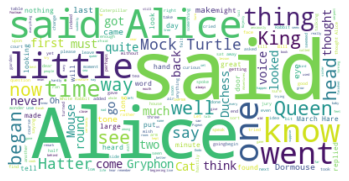

In [34]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

<Figure size 1008x1296 with 0 Axes>

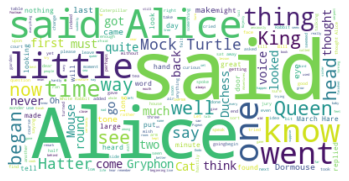

In [37]:
plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()
#ini kalo gambar gede baru kerasa, biar kualitasnya lebih bagus

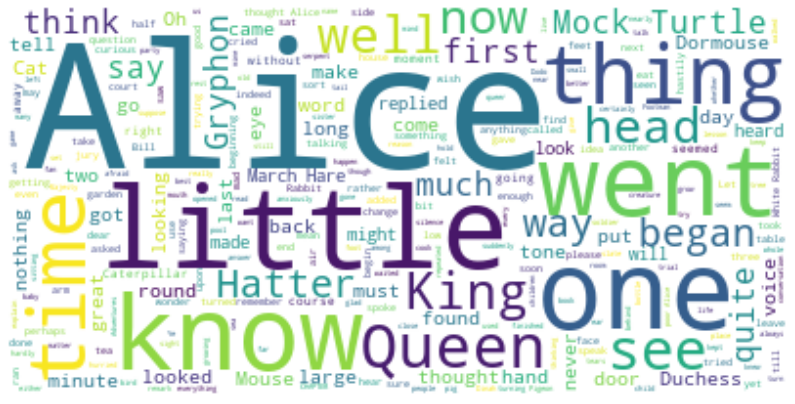

In [40]:
stopwords.add('said')

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [41]:
!conda install -c anaconda seaborn --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\910156\anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    icc_rt-2019.0.0            |       h0cc432a_1         9.4 MB  anaconda
    scipy-1.5.2                |   py38h14eb087_0        11.9 MB
    seaborn-0.11.0             |             py_0         216 KB  anaconda
    ------------------------------------------------------------
                                           Total:        21.6 MB

The following NEW packages will be INSTALLED:

  icc_rt             anaconda/win-64::icc_rt-2019.0.0-h0cc432a_1
  scipy              pkgs/main/win-64::scipy-1.5.2-py38h14eb087_0
  seaborn            anaconda/noarch::seaborn-0.11.0-py_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificat

In [42]:
import seaborn as sns

In [43]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(float,df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns=['year','total']
df_tot.head()

KeyError: "None of [Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',\n       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',\n       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',\n       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],\n      dtype='object')] are in the [columns]"

In [44]:
sns.regplot(x='year',y='total',data=df_tot)

NameError: name 'df_tot' is not defined

In [45]:
sns.scatterplot(x='year',y='total',data=df_tot)

NameError: name 'df_tot' is not defined

# #Folium

In [46]:
!conda install -c conda-forge folium --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\910156\anaconda3

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.11.0              |             py_0          61 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          87 KB

The following NEW packages will be INSTALLED:

  branca             conda-forge/noarch::branca-0.4.1-py_0
  folium             conda-forge/noarch::folium-0.11.0-py_0

The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2020.10.14-0 --> conda-forge::ca-certificates-2020.12.5-h5b45459_0
  certifi                anaconda::certifi-2020.6.20-py38_0 --> conda-forge::certifi-2020.12.5-

In [47]:
import folium

In [48]:
world_map = folium.Map()
world_map

In [56]:
world_map = folium.Map(location=[-7.0051, 110.4381],zoom_start=9) #adjust value zoom_start 0-15 buat deket jauhnya pas di titik yang dimaksud
world_map

In [55]:
world_map = folium.Map(location=[-7.0051, 110.4381],zoom_start=9, tiles='Stamen Toner') #adjust value zoom_start 0-15 buat deket jauhnya pas di titik yang dimaksud
world_map

In [57]:
world_map = folium.Map(location=[-7.0051, 110.4381],zoom_start=9, tiles='Stamen Terrain') #adjust value zoom_start 0-15 buat deket jauhnya pas di titik yang dimaksud
world_map

In [58]:
df_incidents=pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [59]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [60]:
limit = 100
df_incidents = df_incidents.iloc[0:limit,:]